In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import subprocess
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 1000)

TRUTH_PATH = 'I:\Atharva\Documents\sentiment-analysis-witness\dataset - RealLifeDeceptionDetection.2016\Real-life_Deception_Detection_2016\Clips\Truthful'
DECEP_PATH = 'I:\Atharva\Documents\sentiment-analysis-witness\dataset - RealLifeDeceptionDetection.2016\Real-life_Deception_Detection_2016\Clips\Deceptive'
CSV_PATH = 'I:\Atharva\Documents\sentiment-analysis-witness\sw\OpenFace_2.2.0_win_x64\OpenFace_2.2.0_win_x64\processed'
NUM_LIES = 61
NUM_TRUTH = 60

In [23]:
df = pd.read_csv('trial_lie_001.csv')
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,eye_lmk_x_27,eye_lmk_x_28,eye_lmk_x_29,eye_lmk_x_30,eye_lmk_x_31,eye_lmk_x_32,eye_lmk_x_33,eye_lmk_x_34,eye_lmk_x_35,eye_lmk_x_36,eye_lmk_x_37,eye_lmk_x_38,eye_lmk_x_39,eye_lmk_x_40,eye_lmk_x_41,eye_lmk_x_42,eye_lmk_x_43,eye_lmk_x_44,eye_lmk_x_45,eye_lmk_x_46,eye_lmk_x_47,eye_lmk_x_48,eye_lmk_x_49,eye_lmk_x_50,eye_lmk_x_51,eye_lmk_x_52,eye_lmk_x_53,eye_lmk_x_54,eye_lmk_x_55,eye_lmk_y_0,eye_lmk_y_1,eye_lmk_y_2,eye_lmk_y_3,eye_lmk_y_4,eye_lmk_y_5,eye_lmk_y_6,eye_lmk_y_7,eye_lmk_y_8,eye_lmk_y_9,eye_lmk_y_10,eye_lmk_y_11,eye_lmk_y_12,eye_lmk_y_13,eye_lmk_y_14,eye_lmk_y_15,eye_lmk_y_16,eye_lmk_y_17,eye_lmk_y_18,eye_lmk_y_19,eye_lmk_y_20,eye_lmk_y_21,eye_lmk_y_22,eye_lmk_y_23,eye_lmk_y_24,eye_lmk_y_25,eye_lmk_y_26,eye_lmk_y_27,eye_lmk_y_28,eye_lmk_y_29,eye_lmk_y_30,eye_lmk_y_31,eye_lmk_y_32,eye_lmk_y_33,eye_lmk_y_34,eye_lmk_y_35,eye_lmk_y_36,eye_lmk_y_37,eye_lmk_y_38,eye_lmk_y_39,eye_lmk_y_40,eye_lmk_y_41,eye_lmk_y_42,eye_lmk_y_43,eye_lmk_y_44,eye_lmk_y_45,eye_lmk_y_46,eye_lmk_y_47,eye_lmk_y_48,eye_lmk_y_49,eye_lmk_y_50,eye_lmk_y_51,eye_lmk_y_52,eye_lmk_y_53,eye_lmk_y_54,eye_lmk_y_55,eye_lmk_X_0,eye_lmk_X_1,eye_lmk_X_2,eye_lmk_X_3,eye_lmk_X_4,eye_lmk_X_5,eye_lmk_X_6,eye_lmk_X_7,eye_lmk_X_8,eye_lmk_X_9,eye_lmk_X_10,eye_lmk_X_11,eye_lmk_X_12,eye_lmk_X_13,eye_lmk_X_14,eye_lmk_X_15,eye_lmk_X_16,eye_lmk_X_17,eye_lmk_X_18,eye_lmk_X_19,eye_lmk_X_20,eye_lmk_X_21,eye_lmk_X_22,eye_lmk_X_23,eye_lmk_X_24,eye_lmk_X_25,eye_lmk_X_26,eye_lmk_X_27,eye_lmk_X_28,eye_lmk_X_29,eye_lmk_X_30,eye_lmk_X_31,eye_lmk_X_32,eye_lmk_X_33,eye_lmk_X_34,eye_lmk_X_35,eye_lmk_X_36,eye_lmk_X_37,eye_lmk_X_38,eye_lmk_X_39,eye_lmk_X_40,eye_lmk_X_41,eye_lmk_X_42,eye_lmk_X_43,eye_lmk_X_44,eye_lmk_X_45,eye_lmk_X_46,eye_lmk_X_47,eye_lmk_X_48,eye_lmk_X_49,eye_lmk_X_50,eye_lmk_X_51,eye_lmk_X_52,eye_lmk_X_53,eye_lmk_X_54,eye_lmk_X_55,eye_lmk_Y_0,eye_lmk_Y_1,eye_lmk_Y_2,eye_lmk_Y_3,eye_lmk_Y_4,eye_lmk_Y_5,eye_lmk_Y_6,eye_lmk_Y_7,eye_lmk_Y_8,eye_lmk_Y_9,eye_lmk_Y_10,eye_lmk_Y_11,eye_lmk_Y_12,eye_lmk_Y_13,eye_lmk_Y_14,eye_lmk_Y_15,eye_lmk_Y_16,eye_lmk_Y_17,eye_lmk_Y_18,eye_lmk_Y_19,eye_lmk_Y_20,eye_lmk_Y_21,eye_lmk_Y_22,eye_lmk_Y_23,eye_lmk_Y_24,eye_lmk_Y_25,eye_lmk_Y_26,eye_lmk_Y_27,eye_lmk_Y_28,eye_lmk_Y_29,eye_lmk_Y_30,eye_lmk_Y_31,eye_lmk_Y_32,eye_lmk_Y_33,eye_lmk_Y_34,eye_lmk_Y_35,eye_lmk_Y_36,eye_lmk_Y_37,eye_lmk_Y_38,eye_lmk_Y_39,eye_lmk_Y_40,eye_lmk_Y_41,eye_lmk_Y_42,eye_lmk_Y_43,eye_lmk_Y_44,eye_lmk_Y_45,eye_lmk_Y_46,eye_lmk_Y_47,eye_lmk_Y_48,eye_lmk_Y_49,eye_lmk_Y_50,eye_lmk_Y_51,eye_lmk_Y_52,eye_lmk_Y_53,eye_lmk_Y_54,eye_lmk_Y_55,eye_lmk_Z_0,eye_lmk_Z_1,eye_lmk_Z_2,eye_lmk_Z_3,eye_lmk_Z_4,eye_lmk_Z_5,eye_lmk_Z_6,eye_lmk_Z_7,eye_lmk_Z_8,eye_lmk_Z_9,eye_lmk_Z_10,eye_lmk_Z_11,eye_lmk_Z_12,eye_lmk_Z_13,eye_lmk_Z_14,eye_lmk_Z_15,eye_lmk_Z_16,eye_lmk_Z_17,eye_lmk_Z_18,eye_lmk_Z_19,eye_lmk_Z_20,eye_lmk_Z_21,eye_lmk_Z_22,eye_lmk_Z_23,eye_lmk_Z_24,eye_lmk_Z_25,eye_lmk_Z_26,eye_lmk_Z_27,eye_lmk_Z_28,eye_lmk_Z_29,eye_lmk_Z_30,eye_lmk_Z_31,eye_lmk_Z_32,eye_lmk_Z_33,eye_lmk_Z_34,eye_lmk_Z_35,eye_lmk_Z_36,eye_lmk_Z_37,eye_lmk_Z_38,eye_lmk_Z_39,eye_lmk_Z_40,eye_lmk_Z_41,eye_lmk_Z_42,eye_lmk_Z_43,eye_lmk_Z_44,eye_lmk_Z_45,eye_lmk_Z_46,eye_lmk_Z_47,eye_lmk_Z_48,eye_lmk_Z_49,eye_lmk_Z_50,eye_lmk_Z_51,eye_lmk_Z_52,eye_lmk_Z_53,eye_lmk_Z_54,eye_lmk_Z_55,pose_Tx,pose_Ty,pose_Tz,pose_Rx,pose_Ry,pose_Rz,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_4

In [21]:
cols = []
for x in df.columns:
    if x.startswith(' AU'):
        cols.append(x)
print('useful cols = ', len(cols))

useful cols =  35


In [24]:
df.drop(df.iloc[:, :-len(cols)], inplace=True, axis=1)
df.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0.0,0.0,0.74,0.0,0.00,0.28,0.13,0.11,0.47,0.00,0.0,0.39,0.0,0.0,0.00,0.0,0.13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.86,0.0,0.02,0.40,0.15,0.08,0.51,0.05,0.0,0.33,0.0,0.0,0.00,0.0,0.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.93,0.0,0.10,0.57,0.11,0.16,0.52,0.09,0.0,0.24,0.0,0.0,0.06,0.0,0.26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.92,0.0,0.20,0.73,0.04,0.23,0.52,0.08,0.0,0.24,0.0,0.0,0.07,0.0,0.22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.93,0.0,0.34,0.64,0.00,0.29,0.52,0.04,0.0,0.22,0.0,0.0,0.10,0.0,0.22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_c = df.drop(df.iloc[:, :-18], axis=1)
df_c

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_r = df.drop(df.iloc[:, 17:], axis=1)
df_r

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0.0,0.0,0.74,0.0,0.00,0.28,0.13,0.11,0.47,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.13
1,0.0,0.0,0.86,0.0,0.02,0.40,0.15,0.08,0.51,0.05,0.00,0.33,0.00,0.00,0.00,0.00,0.20
2,0.0,0.0,0.93,0.0,0.10,0.57,0.11,0.16,0.52,0.09,0.00,0.24,0.00,0.00,0.06,0.00,0.26
3,0.0,0.0,0.92,0.0,0.20,0.73,0.04,0.23,0.52,0.08,0.00,0.24,0.00,0.00,0.07,0.00,0.22
4,0.0,0.0,0.93,0.0,0.34,0.64,0.00,0.29,0.52,0.04,0.00,0.22,0.00,0.00,0.10,0.00,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.0,0.0,0.61,0.0,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.26,0.06,0.35,0.04,0.07,0.00
506,0.0,0.0,0.69,0.0,0.00,0.00,0.00,0.00,0.09,0.00,0.02,0.23,0.00,0.31,0.06,0.06,0.00
507,0.0,0.0,0.75,0.0,0.00,0.00,0.00,0.00,0.09,0.00,0.05,0.25,0.00,0.30,0.07,0.06,0.00
508,0.0,0.0,0.80,0.0,0.00,0.00,0.03,0.00,0.10,0.00,0.05,0.25,0.02,0.27,0.03,0.03,0.00


In [63]:
df_c.mean(axis=0)

 AU01_c    0.309804
 AU02_c    0.315686
 AU04_c    0.978431
 AU05_c    0.000000
 AU06_c    0.472549
 AU07_c    0.250980
 AU09_c    0.009804
 AU10_c    0.107843
 AU12_c    0.158824
 AU14_c    0.207843
 AU15_c    0.033333
 AU17_c    0.047059
 AU20_c    0.021569
 AU23_c    0.000000
 AU25_c    0.323529
 AU26_c    0.154902
 AU28_c    0.000000
 AU45_c    0.247059
dtype: float64

<h3> csv creation from openface

In [47]:
x = []
for f in tqdm(glob.glob(os.path.join(DECEP_PATH, '*'))):
    print(f)
    command = ['I:\Atharva\Documents\sentiment-analysis-witness\sw\OpenFace_2.2.0_win_x64\OpenFace_2.2.0_win_x64\FeatureExtraction.exe', '-f', f]
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE, shell=True)
    csv_n = f[f.rfind('\\')+1:-3] + 'csv' 
    df = pd.read_csv(os.path.join('processed', csv_n))
    df_c = df.drop(df.iloc[:, :-35], axis=1)
    x.append(df_c.mean(axis=0))
df_deceptive = pd.DataFrame(x)

100%|██████████| 61/61 [28:23<00:00, 27.92s/it]


In [52]:
x = []
for f in tqdm(glob.glob(os.path.join(TRUTH_PATH, '*'))):
    print(f)
    command = ['I:\Atharva\Documents\sentiment-analysis-witness\sw\OpenFace_2.2.0_win_x64\OpenFace_2.2.0_win_x64\FeatureExtraction.exe', '-f', f]
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE, shell=True)
    csv_n = f[f.rfind('\\')+1:-3] + 'csv' 
    df = pd.read_csv(os.path.join('processed', csv_n))
    df_c = df.drop(df.iloc[:, :-35], axis=1)
    x.append(df_c.mean(axis=0))
df_truthful = pd.DataFrame(x)

100%|██████████| 60/60 [24:11<00:00, 24.19s/it]


<h3> dataframe creation

In [2]:
decep_csv = []
truth_csv = []
for f in tqdm(glob.glob(os.path.join('processed', '*.csv'))):
    temp = pd.read_csv(f)
    if f.find('lie') != -1:
        decep_csv.append(temp.mean())
    else:
        truth_csv.append(temp.mean())
truth_df = pd.DataFrame(truth_csv)
decep_df = pd.DataFrame(decep_csv)
truth_df.drop(truth_df.iloc[:, :-35], inplace=True, axis=1)
decep_df.drop(decep_df.iloc[:, :-35], inplace=True, axis=1)
truth_df['isLie'] = 0
decep_df['isLie'] = 1

100%|██████████| 121/121 [00:27<00:00,  4.46it/s]


In [3]:
truth_df.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,isLie
0,0.167888,0.111650,1.588422,0.037913,0.245170,0.513592,0.072864,0.666966,1.031723,0.344345,0.130146,0.382937,0.105850,0.150850,0.468592,0.325243,0.218738,0.084951,0.143204,0.980583,0.072816,0.172330,0.944175,0.007282,0.242718,0.900485,0.796117,0.182039,0.252427,0.021845,0.106796,0.194175,0.075243,0.0,0.186893,0
1,0.129425,0.058663,1.360305,0.076701,0.913418,0.305381,0.061878,0.140643,0.018088,0.075922,0.117885,0.300423,0.076379,0.080271,0.387817,0.366853,0.143706,0.071066,0.223350,0.824027,0.252115,0.895093,0.556684,0.000000,0.042301,0.006768,0.126904,0.037225,0.089679,0.021997,0.000000,0.165821,0.055838,0.0,0.285956,0
2,0.177859,0.101332,0.034125,0.053003,0.554151,0.097076,0.070366,0.131540,0.062950,0.492010,0.102037,0.402167,0.126710,0.069791,0.492742,0.570078,0.195770,0.151436,0.120104,0.000000,0.417755,0.070496,0.187990,0.000000,0.603133,0.000000,0.496084,0.067885,0.109661,0.107050,0.245431,0.362924,0.211488,0.0,0.156658,0
3,0.193725,0.111666,0.210156,0.064531,1.055780,0.530295,0.099132,0.337761,0.100671,0.299582,0.215919,0.393430,0.141457,0.116390,0.488039,0.472092,0.206865,0.196889,0.207122,0.090872,0.255014,0.238232,0.849775,0.101105,0.819075,0.052804,0.415473,0.237822,0.197708,0.195252,0.375767,0.310274,0.167826,0.0,0.182972,0
4,0.426146,0.179856,0.206654,0.056462,0.585695,0.301361,0.097804,0.291572,0.130988,0.408734,0.156222,0.395321,0.153567,0.160441,0.497239,0.522263,0.402157,0.332694,0.365292,0.049856,0.715244,0.096836,0.334612,0.069032,0.730585,0.043145,0.564717,0.125599,0.285714,0.283797,0.088207,0.303931,0.193672,0.0,0.322148,0


In [4]:
decep_df.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,isLie
0,0.225961,0.074980,0.907196,0.034333,0.166059,0.396510,0.066196,0.179882,0.403745,0.007510,0.116922,0.262922,0.096569,0.067392,0.363471,0.330314,0.234000,0.309804,0.315686,0.978431,0.000000,0.472549,0.250980,0.009804,0.107843,0.158824,0.207843,0.033333,0.047059,0.021569,0.000000,0.323529,0.154902,0.0,0.247059,1
1,0.190395,0.116435,0.922311,0.068292,0.357471,0.363346,0.088207,0.651211,0.337209,0.119317,0.131297,0.338186,0.103127,0.111393,0.417391,0.565864,0.254728,0.240662,0.465848,0.901814,0.008538,0.885806,0.445037,0.036820,0.726254,0.131804,0.833511,0.064568,0.245998,0.299360,0.038420,0.316435,0.170224,0.0,0.148879,1
2,0.197406,0.096415,1.319717,0.031085,0.085425,0.398349,0.070991,0.332453,0.344858,0.006509,0.113066,0.290236,0.045142,0.082028,0.374340,0.398868,0.147311,0.311321,0.292453,1.000000,0.000000,0.198113,0.415094,0.000000,0.259434,0.136792,0.292453,0.066038,0.009434,0.084906,0.014151,0.334906,0.103774,0.0,0.033019,1
3,0.147335,0.082063,1.166160,0.048395,0.220917,0.486074,0.051719,0.550544,0.341375,0.006533,0.162951,0.378166,0.099398,0.067908,0.478653,0.478567,0.162579,0.223496,0.263610,0.988539,0.000000,0.862464,0.340974,0.011461,0.848138,0.114613,0.851003,0.068768,0.217765,0.117479,0.000000,0.312321,0.163324,0.0,0.148997,1
4,0.357116,0.200674,1.308221,0.076979,0.256635,0.409650,0.049732,0.520468,0.328777,0.003290,0.132790,0.395830,0.107790,0.098159,0.461423,0.658727,0.204750,0.342697,0.337079,0.975655,0.000000,0.785893,0.310237,0.014357,0.637328,0.088015,0.503121,0.108614,0.259051,0.082397,0.000000,0.363920,0.206617,0.0,0.227216,1


In [8]:
df_t = df_t.append(truth_df)
df_t

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,isLie
0,0.225961,0.074980,0.907196,0.034333,0.166059,0.396510,0.066196,0.179882,0.403745,0.007510,0.116922,0.262922,0.096569,0.067392,0.363471,0.330314,0.234000,0.309804,0.315686,0.978431,0.000000,0.472549,0.250980,0.009804,0.107843,0.158824,0.207843,0.033333,0.047059,0.021569,0.000000,0.323529,0.154902,0.0,0.247059,1
1,0.190395,0.116435,0.922311,0.068292,0.357471,0.363346,0.088207,0.651211,0.337209,0.119317,0.131297,0.338186,0.103127,0.111393,0.417391,0.565864,0.254728,0.240662,0.465848,0.901814,0.008538,0.885806,0.445037,0.036820,0.726254,0.131804,0.833511,0.064568,0.245998,0.299360,0.038420,0.316435,0.170224,0.0,0.148879,1
2,0.197406,0.096415,1.319717,0.031085,0.085425,0.398349,0.070991,0.332453,0.344858,0.006509,0.113066,0.290236,0.045142,0.082028,0.374340,0.398868,0.147311,0.311321,0.292453,1.000000,0.000000,0.198113,0.415094,0.000000,0.259434,0.136792,0.292453,0.066038,0.009434,0.084906,0.014151,0.334906,0.103774,0.0,0.033019,1
3,0.147335,0.082063,1.166160,0.048395,0.220917,0.486074,0.051719,0.550544,0.341375,0.006533,0.162951,0.378166,0.099398,0.067908,0.478653,0.478567,0.162579,0.223496,0.263610,0.988539,0.000000,0.862464,0.340974,0.011461,0.848138,0.114613,0.851003,0.068768,0.217765,0.117479,0.000000,0.312321,0.163324,0.0,0.148997,1
4,0.357116,0.200674,1.308221,0.076979,0.256635,0.409650,0.049732,0.520468,0.328777,0.003290,0.132790,0.395830,0.107790,0.098159,0.461423,0.658727,0.204750,0.342697,0.337079,0.975655,0.000000,0.785893,0.310237,0.014357,0.637328,0.088015,0.503121,0.108614,0.259051,0.082397,0.000000,0.363920,0.206617,0.0,0.227216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.101973,0.062071,1.685417,0.056605,0.460118,0.227978,0.036948,0.102424,0.019902,0.275770,0.100530,0.270981,0.063935,0.081423,0.389274,0.245662,0.266487,0.048086,0.034347,0.870461,0.005888,0.908734,0.023553,0.014720,0.005888,0.009814,0.740922,0.037291,0.068695,0.007851,0.001963,0.210991,0.114818,0.0,0.346418,0
56,0.162915,0.086971,0.634522,0.056067,0.047041,0.797533,0.062283,1.007006,0.352643,1.509438,0.190623,0.448358,0.108911,0.130729,0.419447,0.451809,0.204978,0.168569,0.171203,0.307287,0.491659,0.060579,0.488147,0.000000,0.882353,0.622476,0.978929,0.208955,0.483758,0.122037,0.458297,0.342406,0.184372,0.0,0.362599,0
57,0.148238,0.086587,0.706683,0.045603,0.297397,0.770905,0.054000,1.053095,0.545492,0.067444,0.105778,0.255349,0.123984,0.077397,0.333667,0.362413,0.174873,0.215873,0.211111,0.942857,0.000000,0.541270,0.490476,0.009524,0.901587,0.093651,0.658730,0.000000,0.147619,0.120635,0.071429,0.234921,0.119048,0.0,0.182540,0
58,0.254222,0.100173,0.401815,0.076160,0.448630,0.473173,0.081185,0.915469,0.702716,0.246074,0.106407,0.302864,0.132951,0.086148,0.348259,0.366741,0.185235,0.181481,0.239506,0.282716,0.087654,0.676543,0.662963,0.003704,0.911111,0.744444,0.875309,0.051852,0.167901,0.177778,0.380247,0.181481,0.066667,0.0,0.137037,0


<h3> write combined csv

In [9]:
df_t.to_csv('frame_au_labels.csv', index=False)

In [2]:
df = pd.read_csv('./frame_au_labels.csv')
df

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,isLie
0,0.225961,0.074980,0.907196,0.034333,0.166059,0.396510,0.066196,0.179882,0.403745,0.007510,0.116922,0.262922,0.096569,0.067392,0.363471,0.330314,0.234000,0.309804,0.315686,0.978431,0.000000,0.472549,0.250980,0.009804,0.107843,0.158824,0.207843,0.033333,0.047059,0.021569,0.000000,0.323529,0.154902,0.0,0.247059,1
1,0.190395,0.116435,0.922311,0.068292,0.357471,0.363346,0.088207,0.651211,0.337209,0.119317,0.131297,0.338186,0.103127,0.111393,0.417391,0.565864,0.254728,0.240662,0.465848,0.901814,0.008538,0.885806,0.445037,0.036820,0.726254,0.131804,0.833511,0.064568,0.245998,0.299360,0.038420,0.316435,0.170224,0.0,0.148879,1
2,0.197406,0.096415,1.319717,0.031085,0.085425,0.398349,0.070991,0.332453,0.344858,0.006509,0.113066,0.290236,0.045142,0.082028,0.374340,0.398868,0.147311,0.311321,0.292453,1.000000,0.000000,0.198113,0.415094,0.000000,0.259434,0.136792,0.292453,0.066038,0.009434,0.084906,0.014151,0.334906,0.103774,0.0,0.033019,1
3,0.147335,0.082063,1.166160,0.048395,0.220917,0.486074,0.051719,0.550544,0.341375,0.006533,0.162951,0.378166,0.099398,0.067908,0.478653,0.478567,0.162579,0.223496,0.263610,0.988539,0.000000,0.862464,0.340974,0.011461,0.848138,0.114613,0.851003,0.068768,0.217765,0.117479,0.000000,0.312321,0.163324,0.0,0.148997,1
4,0.357116,0.200674,1.308221,0.076979,0.256635,0.409650,0.049732,0.520468,0.328777,0.003290,0.132790,0.395830,0.107790,0.098159,0.461423,0.658727,0.204750,0.342697,0.337079,0.975655,0.000000,0.785893,0.310237,0.014357,0.637328,0.088015,0.503121,0.108614,0.259051,0.082397,0.000000,0.363920,0.206617,0.0,0.227216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.101973,0.062071,1.685417,0.056605,0.460118,0.227978,0.036948,0.102424,0.019902,0.275770,0.100530,0.270981,0.063935,0.081423,0.389274,0.245662,0.266487,0.048086,0.034347,0.870461,0.005888,0.908734,0.023553,0.014720,0.005888,0.009814,0.740922,0.037291,0.068695,0.007851,0.001963,0.210991,0.114818,0.0,0.346418,0
117,0.162915,0.086971,0.634522,0.056067,0.047041,0.797533,0.062283,1.007006,0.352643,1.509438,0.190623,0.448358,0.108911,0.130729,0.419447,0.451809,0.204978,0.168569,0.171203,0.307287,0.491659,0.060579,0.488147,0.000000,0.882353,0.622476,0.978929,0.208955,0.483758,0.122037,0.458297,0.342406,0.184372,0.0,0.362599,0
118,0.148238,0.086587,0.706683,0.045603,0.297397,0.770905,0.054000,1.053095,0.545492,0.067444,0.105778,0.255349,0.123984,0.077397,0.333667,0.362413,0.174873,0.215873,0.211111,0.942857,0.000000,0.541270,0.490476,0.009524,0.901587,0.093651,0.658730,0.000000,0.147619,0.120635,0.071429,0.234921,0.119048,0.0,0.182540,0
119,0.254222,0.100173,0.401815,0.076160,0.448630,0.473173,0.081185,0.915469,0.702716,0.246074,0.106407,0.302864,0.132951,0.086148,0.348259,0.366741,0.185235,0.181481,0.239506,0.282716,0.087654,0.676543,0.662963,0.003704,0.911111,0.744444,0.875309,0.051852,0.167901,0.177778,0.380247,0.181481,0.066667,0.0,0.137037,0


<h3>Logistic regression

In [50]:
print(len(decep_df.index))
print(len(truth_df.index))

61
60


In [160]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

X_train = np.append(X[:int(0.8*len(decep_df.index)),:], X[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)
y_train = np.append(y[:int(0.8*len(decep_df.index)),:], y[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)

X_test = np.append(X[int(0.8*len(decep_df.index)):len(decep_df.index),:], X[int(NUM_LIES+0.8*len(truth_df.index)):,:],axis=0)
y_test = np.append(y[int(0.8*len(decep_df.index)):len(decep_df.index),:], y[int(NUM_LIES+0.8*len(truth_df.index)):,:],axis=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Accuracy: ', clf.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, clf.predict(X_test)))
print('precision score: ', precision_score(y_test, clf.predict(X_test)))
print('recall score: ', recall_score(y_test, clf.predict(X_test)))
clf.predict(X)

Accuracy:  0.5697674418604651
confusion_matrix:
 [[47 13]
 [24  2]]
              precision    recall  f1-score   support

           1       0.13      0.08      0.10        26
           0       0.66      0.78      0.72        60

    accuracy                           0.57        86
   macro avg       0.40      0.43      0.41        86
weighted avg       0.50      0.57      0.53        86

f1 score:  0.0975609756097561
precision score:  0.13333333333333333
recall score:  0.07692307692307693


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [162]:
X = np.array(df.iloc[:, -19:-1]) #only taking classification columns
y = np.array(df.iloc[:, -1:])

X_train = np.append(X[:int(0.8*len(decep_df.index)),:], X[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)
y_train = np.append(y[:int(0.8*len(decep_df.index)),:], y[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)

X_test = np.append(X[int(0.8*len(decep_df.index)):len(decep_df.index),:], X[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)
y_test = np.append(y[int(0.8*len(decep_df.index)):len(decep_df.index),:], y[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Accuracy: ', clf.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, clf.predict(X_test)))
print('precision score: ', precision_score(y_test, clf.predict(X_test)))
print('recall score: ', recall_score(y_test, clf.predict(X_test)))
clf.predict(X)

Accuracy:  0.5465116279069767
confusion_matrix:
 [[45 15]
 [24  2]]
              precision    recall  f1-score   support

           1       0.12      0.08      0.09        26
           0       0.65      0.75      0.70        60

    accuracy                           0.55        86
   macro avg       0.38      0.41      0.40        86
weighted avg       0.49      0.55      0.51        86

f1 score:  0.0930232558139535
precision score:  0.11764705882352941
recall score:  0.07692307692307693


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           1       0.12      0.08      0.09        26
           0       0.65      0.75      0.70        60

    accuracy                           0.55        86
   macro avg       0.38      0.41      0.40        86
weighted avg       0.49      0.55      0.51        86

f1 score:  0.0930232558139535
precision score:  0.11764705882352941
recall score:  0.07692307692307693


<h3> knn

In [166]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

X_train = np.append(X[:int(0.8*len(decep_df.index)),:], X[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)
y_train = np.append(y[:int(0.8*len(decep_df.index)),:], y[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)

X_test = np.append(X[int(0.8*len(decep_df.index)):len(decep_df.index),:], X[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)
y_test = np.append(y[int(0.8*len(decep_df.index)):len(decep_df.index),:], y[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
print('Accuracy: ', neigh.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, neigh.predict(X_test)))
print(classification_report(y_test, neigh.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, neigh.predict(X_test)))
print('precision score: ', precision_score(y_test, neigh.predict(X_test)))
print('recall score: ', recall_score(y_test, neigh.predict(X_test)))
neigh.predict(X)

Accuracy:  0.686046511627907
confusion_matrix:
 [[55  5]
 [22  4]]
              precision    recall  f1-score   support

           1       0.44      0.15      0.23        26
           0       0.71      0.92      0.80        60

    accuracy                           0.69        86
   macro avg       0.58      0.54      0.52        86
weighted avg       0.63      0.69      0.63        86

f1 score:  0.2285714285714286
precision score:  0.4444444444444444
recall score:  0.15384615384615385


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [204]:
X = np.array(df.iloc[:, -19:-1])
y = np.array(df.iloc[:, -1:])

X_train = np.append(X[:int(0.8*len(decep_df.index)),:], X[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)
y_train = np.append(y[:int(0.8*len(decep_df.index)),:], y[len(decep_df.index):len(decep_df.index)+int(0.8*len(truth_df.index)),:],axis=0)

X_test = np.append(X[int(0.8*len(decep_df.index)):len(decep_df.index),:], X[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)
y_test = np.append(y[int(0.8*len(decep_df.index)):len(decep_df.index),:], y[NUM_LIES+int(0.8*len(truth_df.index)):,:],axis=0)

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
print('Accuracy: ', neigh.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, neigh.predict(X_test)))
print(classification_report(y_test, neigh.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, neigh.predict(X_test)))
print('precision score: ', precision_score(y_test, neigh.predict(X_test)))
print('recall score: ', recall_score(y_test, neigh.predict(X_test)))
neigh.predict(X)

Accuracy:  0.6162790697674418
confusion_matrix:
 [[53  7]
 [26  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           0       0.67      0.88      0.76        60

    accuracy                           0.62        86
   macro avg       0.34      0.44      0.38        86
weighted avg       0.47      0.62      0.53        86

f1 score:  0.0
precision score:  0.0
recall score:  0.0


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

<AxesSubplot:>

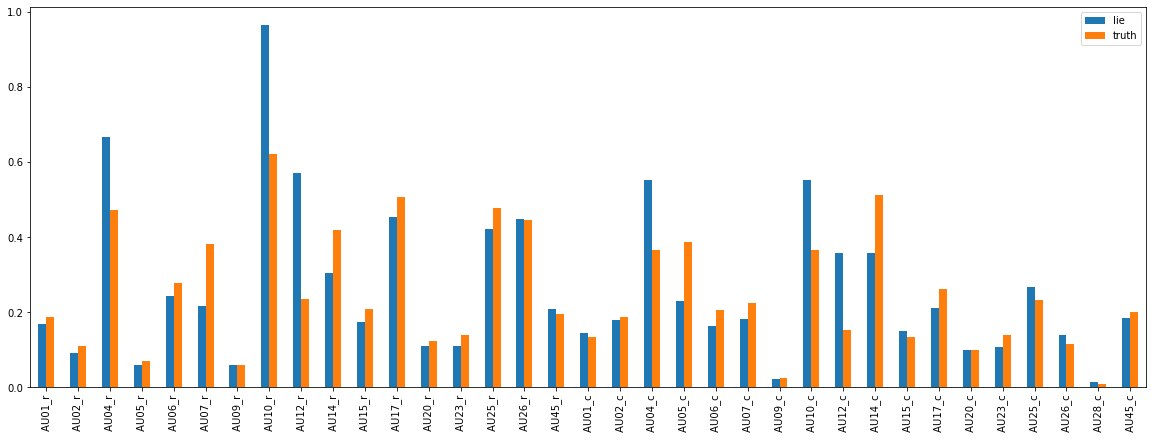

In [28]:
pd.DataFrame({'lie': df.iloc[:61,:-1].mean(), 'truth': df.iloc[61:, :-1].mean()}).plot.bar(figsize=(20,7))

In [ ]:
use = []

In [3]:
df_testing = df[[' AU04_r', ' AU07_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU17_r', ' AU17_r', ' AU23_r', ' AU25_r', ' AU04_c', ' AU05_c', ' AU06_c', ' AU07_c', ' AU10_c', ' AU12_c', ' AU14_c', ' AU17_c', ' AU23_c', ' AU25_c', ' AU26_c', 'isLie']]
df_testing

,AU04_r,AU07_r,AU10_r,AU12_r,AU14_r,AU17_r,AU17_r,AU23_r,AU25_r,AU04_c,AU05_c,AU06_c,AU07_c,AU10_c,AU12_c,AU14_c,AU17_c,AU23_c,AU25_c,AU26_c,isLie
0,0.907196,0.396510,0.179882,0.403745,0.007510,0.262922,0.262922,0.067392,0.363471,0.978431,0.000000,0.472549,0.250980,0.107843,0.158824,0.207843,0.047059,0.000000,0.323529,0.154902,1
1,0.922311,0.363346,0.651211,0.337209,0.119317,0.338186,0.338186,0.111393,0.417391,0.901814,0.008538,0.885806,0.445037,0.726254,0.131804,0.833511,0.245998,0.038420,0.316435,0.170224,1
2,1.319717,0.398349,0.332453,0.344858,0.006509,0.290236,0.290236,0.082028,0.374340,1.000000,0.000000,0.198113,0.415094,0.259434,0.136792,0.292453,0.009434,0.014151,0.334906,0.103774,1
3,1.166160,0.486074,0.550544,0.341375,0.006533,0.378166,0.378166,0.067908,0.478653,0.988539,0.000000,0.862464,0.340974,0.848138,0.114613,0.851003,0.217765,0.000000,0.312321,0.163324,1
4,1.308221,0.409650,0.520468,0.328777,0.003290,0.395830,0.395830,0.098159,0.461423,0.975655,0.000000,0.785893,0.310237,0.637328,0.088015,0.503121,0.259051,0.000000,0.363920,0.206617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.685417,0.227978,0.102424,0.019902,0.275770,0.270981,0.270981,0.081423,0.389274,0.870461,0.005888,0.908734,0.023553,0.005888,0.009814,0.740922,0.068695,0.001963,0.210991,0.114818,0
117,0.634522,0.797533,1.007006,0.352643,1.509438,0.448358,0.448358,0.130729,0.419447,0.307287,0.491659,0.060579,0.488147,0.882353,0.622476,0.978929,0.483758,0.458297,0.342406,0.184372,0
118,0.706683,0.770905,1.053095,0.545492,0.067444,0.255349,0.255349,0.077397,0.333667,0.942857,0.000000,0.541270,0.490476,0.901587,0.093651,0.658730,0.147619,0.071429,0.234921,0.119048,0
119,0.401815,0.473173,0.915469,0.702716,0.246074,0.302864,0.302864,0.086148,0.348259,0.282716,0.087654,0.676543,0.662963,0.911111,0.744444,0.875309,0.167901,0.380247,0.181481,0.066667,0


In [17]:
X = np.array(df_testing.iloc[:, :-1])
y = np.array(df_testing.iloc[:, -1:])

SPLIT_RATIO = 0.8

X_train = np.append(X[:int(SPLIT_RATIO*NUM_LIES),:], X[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)
y_train = np.append(y[:int(SPLIT_RATIO*NUM_LIES),:], y[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)

X_test = np.append(X[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], X[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)
y_test = np.append(y[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], y[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
print('Accuracy: ', neigh.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, neigh.predict(X_test)))
print(classification_report(y_test, neigh.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, neigh.predict(X_test)))
print('precision score: ', precision_score(y_test, neigh.predict(X_test)))
print('recall score: ', recall_score(y_test, neigh.predict(X_test)))
neigh.predict(X)

Accuracy:  0.36
confusion_matrix:
 [[ 9  3]
 [13  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           0       0.41      0.75      0.53        12

    accuracy                           0.36        25
   macro avg       0.20      0.38      0.26        25
weighted avg       0.20      0.36      0.25        25

f1 score:  0.0
precision score:  0.0
recall score:  0.0


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [62]:
X = np.array(df_testing.iloc[:, :-1])
y = np.array(df_testing.iloc[:, -1:])

SPLIT_RATIO = 0.8

X_train = np.append(X[:int(SPLIT_RATIO*NUM_LIES),:], X[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)
y_train = np.append(y[:int(SPLIT_RATIO*NUM_LIES),:], y[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)

X_test = np.append(X[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], X[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)
y_test = np.append(y[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], y[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

print('Accuracy: ', clf.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, clf.predict(X_test)))
print('precision score: ', precision_score(y_test, clf.predict(X_test)))
print('recall score: ', recall_score(y_test, clf.predict(X_test)))
clf.predict(X)

Accuracy:  0.28
confusion_matrix:
 [[ 7  5]
 [13  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           0       0.35      0.58      0.44        12

    accuracy                           0.28        25
   macro avg       0.17      0.29      0.22        25
weighted avg       0.17      0.28      0.21        25

f1 score:  0.0
precision score:  0.0
recall score:  0.0


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [130]:
X = np.array(df_testing.iloc[:, :-1])
y = np.array(df_testing.iloc[:, -1:])

SPLIT_RATIO = 0.97

X_train = np.append(X[:int(SPLIT_RATIO*NUM_LIES),:], X[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)
y_train = np.append(y[:int(SPLIT_RATIO*NUM_LIES),:], y[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)

X_test = np.append(X[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], X[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)
y_test = np.append(y[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], y[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print('Accuracy: ', clf.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, clf.predict(X_test)))
print('precision score: ', precision_score(y_test, clf.predict(X_test)))
print('recall score: ', recall_score(y_test, clf.predict(X_test)))
clf.predict(X)

Accuracy:  0.75
confusion_matrix:
 [[2 0]
 [1 1]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           0       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

f1 score:  0.6666666666666666
precision score:  1.0
recall score:  0.5


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [152]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

SPLIT_RATIO = 0.9

X_train = np.append(X[:int(SPLIT_RATIO*NUM_LIES),:], X[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)
y_train = np.append(y[:int(SPLIT_RATIO*NUM_LIES),:], y[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)

X_test = np.append(X[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], X[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)
y_test = np.append(y[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], y[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)

clf = RandomForestClassifier(random_state=46)
clf.fit(X_train, y_train)

print('Accuracy: ', clf.score(X_test, y_test))
print('confusion_matrix:\n', confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), labels=[1, 0]))
print('f1 score: ', f1_score(y_test, clf.predict(X_test)))
print('precision score: ', precision_score(y_test, clf.predict(X_test)))
print('recall score: ', recall_score(y_test, clf.predict(X_test)))
clf.predict(X)

Accuracy:  0.6153846153846154
confusion_matrix:
 [[5 1]
 [4 3]]
              precision    recall  f1-score   support

           1       0.75      0.43      0.55         7
           0       0.56      0.83      0.67         6

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13

f1 score:  0.5454545454545454
precision score:  0.75
recall score:  0.42857142857142855


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [5]:
X = np.array(df_testing.iloc[:, :-1])
y = np.array(df_testing.iloc[:, -1:])

SPLIT_RATIO = 0.8

X_train = np.append(X[:int(SPLIT_RATIO*NUM_LIES),:], X[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)
y_train = np.append(y[:int(SPLIT_RATIO*NUM_LIES),:], y[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:],axis=0)

X_test = np.append(X[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], X[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)
y_test = np.append(y[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:], y[NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH):,:],axis=0)

In [4]:
SPLIT_RATIO = 0.8
print(df_testing.iloc[:int(SPLIT_RATIO*NUM_LIES),:].append(df_testing.iloc[NUM_LIES:NUM_LIES+int(SPLIT_RATIO*NUM_TRUTH),:]).shape)
print(df_testing.iloc[int(SPLIT_RATIO*NUM_LIES):NUM_LIES,:].append(df_testing.iloc[int(NUM_LIES+SPLIT_RATIO*NUM_TRUTH):,:]).shape)

(96, 21)
(25, 21)


## text-based

In [24]:
x = []
for f in tqdm(glob.glob(os.path.join('I:\Atharva\Documents\sentiment-analysis-witness\dataset - RealLifeDeceptionDetection.2016\Real-life_Deception_Detection_2016\Transcription\Truthful', '*'))):
    with open(f, 'r', encoding='utf-8') as text:
        x.append(text.read())
        #print("\n\n" + text.read())
df_truthful_text = pd.DataFrame(x,columns=[['text']])
df_truthful_text['isLie'] = 0

x = []
for f in tqdm(glob.glob(os.path.join('I:\Atharva\Documents\sentiment-analysis-witness\dataset - RealLifeDeceptionDetection.2016\Real-life_Deception_Detection_2016\Transcription\Deceptive', '*'))):
    with open(f, 'r', encoding='utf-8') as text:
        x.append(text.read())
        #print("\n\n" + text.read())
df_deceptive_text = pd.DataFrame(x,columns=[['text']])
df_deceptive_text['isLie'] = 1

100%|██████████| 61/61 [00:00<00:00, 4682.17it/s]


In [27]:
df_truthful_text.head()
#df_deceptive_text.head()

,text,isLie
0,Reforming the criminal justice system matters ...,0
1,"All of us, who have represented people for yea...",0
2,"But yes, I was there. Yep, I stayed. Uh ... Ye...",0
3,"I do. I was, uh... in the office, and I got a ...",0
4,"No, when Rusty backed up out of the garage ......",0


In [157]:
SPLIT_RATIO = 0.8
pd.DataFrame(df_truthful_text.iloc[:int(SPLIT_RATIO*NUM_TRUTH), :].append(df_deceptive_text.iloc[:int(SPLIT_RATIO*NUM_LIES)])).to_csv('train_text.csv', index=False)

pd.DataFrame(df_truthful_text.iloc[int(SPLIT_RATIO*NUM_TRUTH):, :].append(df_deceptive_text.iloc[int(SPLIT_RATIO*NUM_LIES):])).to_csv('test_text.csv', index=False)

In [153]:
len(df_truthful_text.index)


60